# Classification (MultiClass) using SVM & Optimal Parameter Selection

**Task :** To classify digits from 0 to 9 using [MNIST Handdrawn Digits Image Datatset](https://www.kaggle.com/c/digit-recognizer).

**About Data: **
Data contains images of hand-drawn digits, from zero through nine. 

Image Details : Gray Scale , 28x28 pixel ,pixel value - 0(lightest) to 255(darkest)


Importing required libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt, matplotlib.image as mpimg
import time 
import warnings
from sklearn import svm
from sklearn.model_selection import GridSearchCV

%matplotlib inline
warnings.filterwarnings('ignore')


  ## <a id="explore">1. Exploring and Preparing Data</a>
<br>
Reading data from "train.csv", which will later be divided into train(to train model) and test(to check accuracy).  

In [3]:
data = pd.read_csv('train.csv')
print("Train Data Shape is: ",data.shape)
data.head()

Train Data Shape is:  (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Extracting label from data

In [4]:
label = data.label
data=data.drop('label',axis=1)
print("Data Shape: ",data.shape)
print("Label Shape: ",label.shape)

Data Shape:  (42000, 784)
Label Shape:  (42000,)


In [5]:
data.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

Converting 1D array to 2D 28x28 array using [**reshape**](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.reshape.html) , to plot and view grayscale images. 

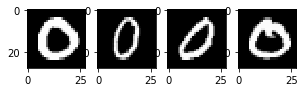

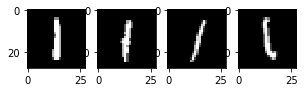

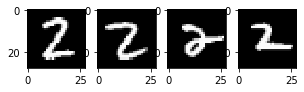

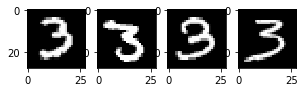

In [6]:
for x in range(0,4):
    train_0=data[label==x]
    data_new=[]
    for idx in train_0.index:
        val=train_0.loc[idx].values.reshape(28,28)
        data_new.append(val)
    plt.figure(figsize=(25,25))   
    for x in range(1,5):
        ax1=plt.subplot(1, 20, x)
        ax1.imshow(data_new[x],cmap='gray')

Having a look at pixel values frequency (0 to 255)<br>
To get a better idea, lets convert the plot to Log Scale.<br>
Based on leading 0s and 255s we can try converting it to binary in the later steps to simplify the problem.

Text(0, 0.5, 'Frequency')

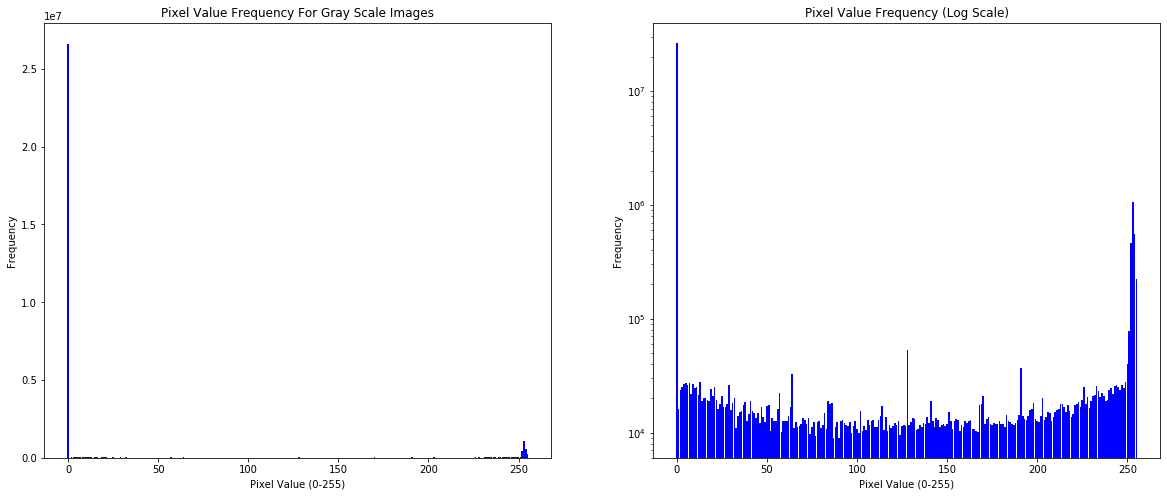

In [18]:
y = pd.value_counts(data.values.ravel()).sort_index()
N = len(y)
x = range(N)
width =0.9
plt.figure(figsize=[20,8])
ax1=plt.subplot(1, 2,1)
ax1.bar(x, y, width, color="blue")
plt.title('Pixel Value Frequency For Gray Scale Images')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')
#ax1.imshow(data_new[x],cmap='gray')
ax2=plt.subplot(1, 2,2)
ax2.bar(x, y, width, color="blue")
plt.title('Pixel Value Frequency (Log Scale)')
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')
#plt.yscale('')

### Splitting data into Train and Test Data and Labels
<br>

Dividing Data randomly into **train** and **test**. Out of total **train.csv** Data, 80% is kept as train for training the model and 20% is kept as test to score the model. 

In [19]:
train, test,train_labels, test_labels = train_test_split(data, label, train_size=0.8, random_state=42)
print("Train Data Shape: ",train.shape)
print("Train Label Shape: ",train_labels.shape)
print("Test Data Shape: ",test.shape)
print("Test Label Shape: ",test_labels.shape)

Train Data Shape:  (33600, 784)
Train Label Shape:  (33600,)
Test Data Shape:  (8400, 784)
Test Label Shape:  (8400,)


## <a id="clf_svm">2. Classification using SVM<a>

Using [SVM Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) from sklearn library.<br>
We have 33600 training samples, fitting them is going to take alot of time. To keep it simple for now, lets select 5000 out of them.<br>
You can change the value i to use the desired number of samples.

In [20]:
i=5000;
score=[]
fittime=[]
scoretime=[]
clf = svm.SVC(random_state=42)

I am not passing parameters in this step to keep it simple and will be using the default ones.

In [21]:
print("Default Parameters are: \n",clf.get_params)

Default Parameters are: 
 <bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)>


### <a id="case1">Case 1 - Gray Scale Images</a>


Fitting train data and finding a score for test data to check model performance

In [22]:
start_time = time.time()
clf.fit(train[:i], train_labels[:i].values.ravel())
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
start_time = time.time()
score=clf.score(test,test_labels)
print("Accuracy for grayscale: ",score)
scoretime = time.time() - start_time
print("Time consumed to score: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
case1=[score,fittime,scoretime]

Time consumed to fit model:  00:02:35
Accuracy for grayscale:  0.09345238095238095
Time consumed to score:  00:02:00


### <a id="case2">Case 2 - Binary Images</a>
<br>
To simply the problem, converting images to black and white from gray scale by replacing all values > 0 to 1. 
<br>And Converting 1D array to 2D 28x28 array using [**reshape**](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.reshape.html) , to plot and view **binary** images. 

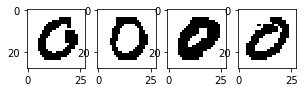

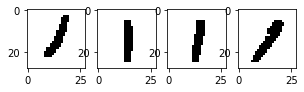

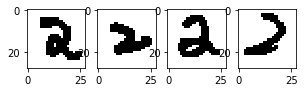

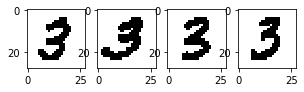

In [23]:
test_b=test
train_b=train
test_b[test_b>0]=1
train_b[train_b>0]=1
for x in range(0,4):
    train_0=train_b[train_labels==x]
    data_new=[]
    for idx in train_0.index:
        val=train_0.loc[idx].values.reshape(28,28)
        data_new.append(val)
    plt.figure(figsize=(25,25))   
    for x in range(1,5):
        ax1=plt.subplot(1, 20, x)
        ax1.imshow(data_new[x],cmap='binary')

In [24]:
start_time = time.time()
clf.fit(train_b[:i], train_labels[:i].values.ravel())
fititme = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
score=clf.score(test_b,test_labels)
start_time = time.time()
clf.fit(train_b[:i], train_labels[:i].values.ravel())
print("Accuracy for binary: ",score)
scoretime = time.time() - start_time
print("Time consumed to score: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
case2=[score,fittime,scoretime]

Time consumed to fit model:  00:02:35
Accuracy for binary:  0.9111904761904762
Time consumed to score:  00:00:38


It can be seen that for the chosen training samples, accuracy of Case 2 (~90%) is way higher than Case 1 (10%).

However, the high dimensionaly of data is making computational time high. Lets reduce the dimensions using PCA (Principal Component Analysis)

### <a id="case3">Case 3 - GrayScale + Dimensionality Reduction - PCA</a> <br>

I am using [sklearnPCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) library here to perform PCA Dimensionality Reduction.

Here, Data is standardized and PCA is performed on data with all the components. Then variance is plotted for all components to decide which components to remove. 

Text(0, 0.5, 'Variance')

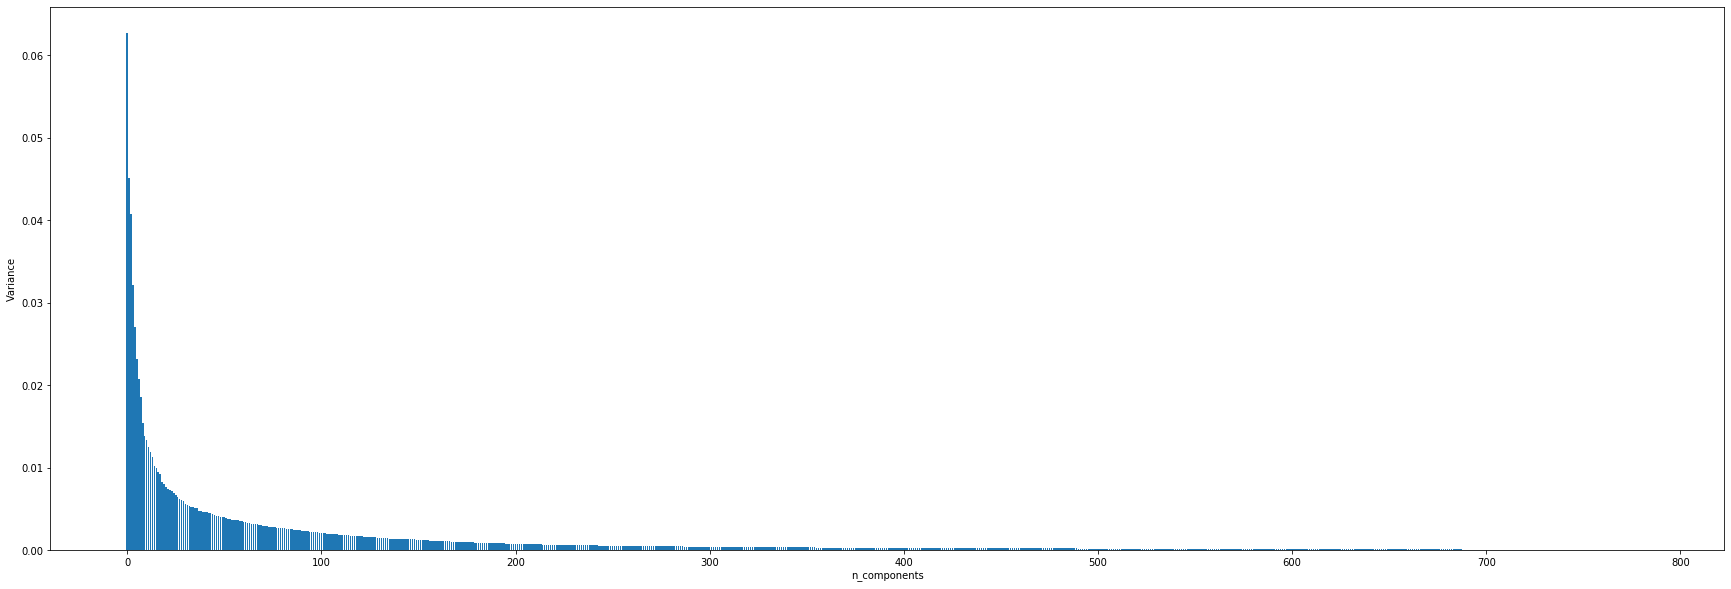

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

#standardized data
sc = StandardScaler().fit(train)
X_std_train = sc.transform(train)
X_std_test = sc.transform(test)

#If n_components is not set then all components are stored 
sklearn_pca = sklearnPCA().fit(X_std_train)
train_pca = sklearn_pca.transform(X_std_train)
test_pca = sklearn_pca.transform(X_std_test)

#Percentage of variance explained by each of the selected components.
#If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.
var_per = sklearn_pca.explained_variance_ratio_
cum_var_per = sklearn_pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(30,10))
ind = np.arange(len(var_per)) 
plt.bar(ind,var_per)
plt.xlabel('n_components')
plt.ylabel('Variance')

Keeping 90% of information by choosing components falling within 0.90 cumulative.

In [26]:
n_comp=len(cum_var_per[cum_var_per <= 0.95])
print("Keeping 90% Info with ",n_comp," components")
sklearn_pca = sklearnPCA(n_components=n_comp)
train_pca = sklearn_pca.fit_transform(X_std_train)
test_pca = sklearn_pca.transform(X_std_test)
print("Shape before PCA for Train: ",X_std_train.shape)
print("Shape after PCA for Train: ",train_pca.shape)
print("Shape before PCA for Test: ",X_std_test.shape)
print("Shape after PCA for Test: ",test_pca.shape)


Keeping 90% Info with  429  components
Shape before PCA for Train:  (33600, 784)
Shape after PCA for Train:  (33600, 429)
Shape before PCA for Test:  (8400, 784)
Shape after PCA for Test:  (8400, 429)


Lets find the score using reduced dimensions keeping the same amount of samples, to compare accuracy.

In [27]:
start_time = time.time()
clf.fit(train_pca[:i], train_labels[:i].values.ravel())
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
start_time = time.time()
score=clf.score(test_pca,test_labels)
print("Accuracy for grayscale: ",score)
scoretime = time.time() - start_time
print("Time consumed to score model: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
case3=[score,fittime,scoretime]

Time consumed to fit model:  00:00:22
Accuracy for grayscale:  0.9232142857142858
Time consumed to score model:  00:00:37


It can be seen that for the chosen training samples, accuracy of Case1 after PCA is (~91%) which was previously (10%).

### <a id="case4">Case 4 - Binary + Dimensionality Reduction - PCA</a> <br> 
<br>
Using the steps steps we used in Case 3.

Text(0, 0.5, 'Variance')

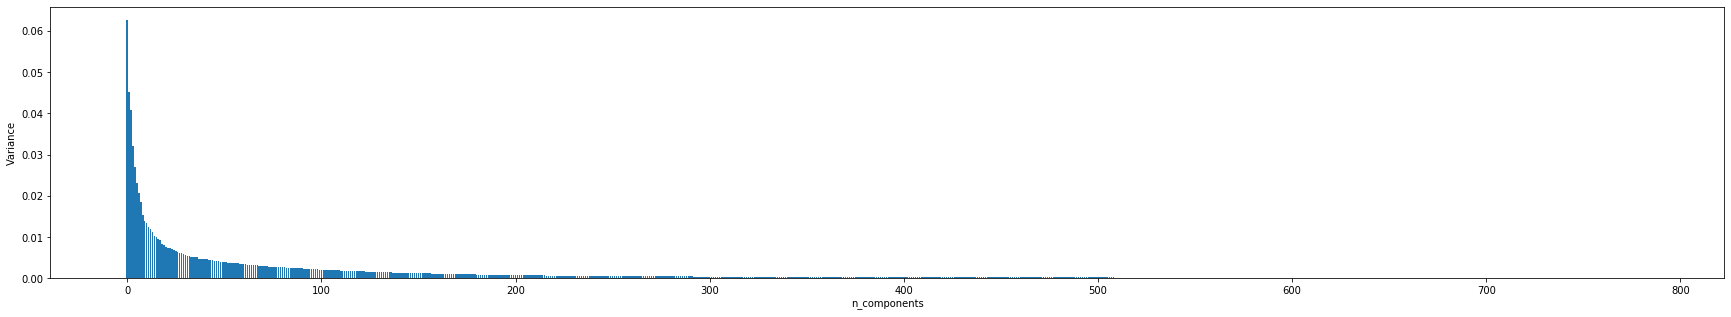

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

#standardized data
sc = StandardScaler().fit(train_b)
X_std_train = sc.transform(train_b)
X_std_test = sc.transform(test_b)

#If n_components is not set then all components are stored 
sklearn_pca = sklearnPCA().fit(X_std_train)
#train_pca_b = sklearn_pca.transform(X_std_train)
#test_pca_b = sklearn_pca.transform(X_std_test)

#Percentage of variance explained by each of the selected components.
#If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.
var_per = sklearn_pca.explained_variance_ratio_
cum_var_per = sklearn_pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(30,5))
ind = np.arange(len(var_per)) 
plt.bar(ind,var_per)
plt.xlabel('n_components')
plt.ylabel('Variance')

In [ ]:
n_comp=len(cum_var_per[cum_var_per <= 0.95])
print("Keeping 90% Info with ",n_comp," components")
sklearn_pca = sklearnPCA(n_components=n_comp)
train_pca_b = sklearn_pca.fit_transform(X_std_train)
test_pca_b = sklearn_pca.transform(X_std_test)
print("Shape before PCA for Train: ",X_std_train.shape)
print("Shape after PCA for Train: ",train_pca_b.shape)
print("Shape before PCA for Test: ",X_std_test.shape)
print("Shape after PCA for Test: ",test_pca_b.shape)

In [30]:
start_time = time.time()
clf.fit(train_pca_b[:i], train_labels[:i].values.ravel())
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
start_time = time.time()
score=clf.score(test_pca_b,test_labels)
print("Accuracy for grayscale: ",score)
scoretime = time.time() - start_time
print("Time consumed to score model: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
case4=[score,fittime,scoretime]

Time consumed to fit model:  00:00:15
Accuracy for grayscale:  0.9191666666666667
Time consumed to score model:  00:00:20


### <a id="cases">Comparison of 4 Cases</a>

In [31]:
head =["Accuracy","FittingTime","ScoringTime"]
print("\t\t case1 \t\t\t case2 \t\t\t case3 \t\t\t case4")
for h, c1, c2, c3, c4 in zip(head, case1, case2, case3, case4):
    print("{}\t{}\t{}\t{}\t{}".format(h, c1, c2, c3, c4))

		 case1 			 case2 			 case3 			 case4
Accuracy	0.09345238095238095	0.9111904761904762	0.9232142857142858	0.9191666666666667
FittingTime	155.45564579963684	155.45564579963684	22.565874338150024	15.03504228591919
ScoringTime	120.7395339012146	38.719080448150635	37.41242074966431	20.024869680404663


**Observations:**
*  By simplifying the problem in Case 2 (by converting images to binary), accuracy increases from ~10% to ~91% for the chosen number of samples.
* By reducing dimensions in Case3 and Case4, Fitting Times Reduces Drastically from ~43sec to ~6sec for the chosen number of samples.

 ## <a id="sizevsacc">4. Training Data Size Vs Accuracy , Fitting & Score Times </a>


<br>Understanding how training data size affects accuracy,

In [ ]:
from tqdm import tqdm

fit_time=[]
score=[]
score_time=[]
for j in tqdm(range(1000,31000,5000)):
    start_time = time.time()
    clf.fit(train_pca_b[:j], train_labels[:j].values.ravel())
    fit_time.append(time.time() - start_time)
    start_time = time.time()
    score.append(clf.score(test_pca_b,test_labels))
    score_time.append(time.time() - start_time)

 67%|██████▋   | 4/6 [05:43<02:53, 86.77s/it]

In [ ]:
x=list(range(1000,31000,5000))
plt.figure(figsize=[20,5]);
ax1=plt.subplot(1, 2,1)
ax1.plot(x,score,'-o');
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuray')
ax2=plt.subplot(1, 2,2)
ax2.plot(x,score_time,'-o');
ax2.plot(x,fit_time,'-o');
plt.xlabel('Number of Training Samples')
plt.ylabel('Time to Compute Score/Fit (sec)')
plt.legend(['score_time','fitting_time'])

## <a id="param"> 5. Parameter Selection for SVM using GridSearchCV</a>

Out of parameters below, I will use **Gamma** and **C**, where<br> <br>[Gamma](https://www.quora.com/What-are-C-and-gamma-with-regards-to-a-support-vector-machine) is the parameter of a Gaussian Kernel (to handle non-linear classification)<br>
    and **C** the parameter for the soft margin cost function, also known as cost of misclassification. A large C gives you low bias and high variance and vice versa.

In [ ]:
clf.get_params

In [ ]:
parameters = {'gamma': [1, 0.1, 0.01, 0.001],
             'C': [1000, 100, 10, 1]} 

p = GridSearchCV(clf , param_grid=parameters, cv=3)

For Case 4 (Binary Images and PCA Reduction):

In [ ]:
X=train_pca_b[:i]
y=train_labels[:i].values.ravel()
start_time = time.time()
p.fit(X,y)
elapsed_time = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

In [ ]:
print("Scores for all Parameter Combination: \n",p.cv_results_['mean_test_score'])
print("\nOptimal C and Gamma Combination: ",p.best_params_)
print("\nMaximum Accuracy acheieved on LeftOut Data: ",p.best_score_)

To verify, lets pass the optimal parameters to Classifier and check the score.

In [ ]:
C=p.best_params_['C']
gamma=p.best_params_['gamma']
clf=svm.SVC(C=C,gamma=gamma, random_state=42)

In [ ]:
start_time = time.time()
clf.fit(train_pca_b[:i], train_labels[:i].values.ravel())
elapsed_time = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))
print("Accuracy for binary: ",clf.score(test_pca_b,test_labels))

It can be seen that for the chosen training samples, accuracy of Case 2 has increased from (~91%) to (94%) for the optimal parameters.<br>
Now using all training samples

In [ ]:
start_time = time.time()
clf.fit(train_pca_b, train_labels.values.ravel())
elapsed_time = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))
print("Accuracy for binary: ",clf.score(test_pca_b,test_labels))